In [25]:
from datascience import *
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# Custom functions
def str_to_flt(data_set, column_name):
    '''Removes commas and $ from numbers in a column'''
    data_set[column_name] = data_set[column_name].str.replace(',', '')
    data_set[column_name] = data_set[column_name].str.replace('$', '')
    data_set[column_name] = data_set[column_name].astype(float)
    print(type(data_set[column_name][0]))

In [2]:
# Load the data with dataframes
edf_fips_location_data = pd.read_csv("edf_fips_location_data.csv")
final_data = pd.read_csv("EDF_Database_2v3_1.csv")

# Drop NaN values
final_data.dropna(subset=['Place FIPS'], inplace=True)

# Merge the dataframes
final_data = final_data.merge(edf_fips_location_data, left_on='Place FIPS', right_on='Place FIPS', how='left')

# Move columns to the front
cols = list(final_data)
cols = cols[-3:] + cols[:-3]
final_data = final_data[cols]

# Drop column
final_data.drop(columns=["Unincorporated, Non-Place FIPS"], inplace=True)

# Convert to datascience table
ds_final_data = Table.from_df(final_data)

In [3]:
ds_final_data.show(5)

Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 17 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Not Hispanic or Latino:,Hispanic or Latino,Population 25 Years and Over:,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree,Population 25 Years and Over:.1,Less than High School.1,High School Diploma,Bachelor's Degree or Better,Households:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Median Household Income (In 2020 Inflation Adjusted Dollars),Median Household Income Occupied Housing Units:,Owner Occupied,Renter Occupied,Per Capita Income (In 2020 Inflation Adjusted Dollars),Occupied Housing Units:,Owner Occupied.1,Renter Occupied.1,Owner Occupied Housing Units:,"White Alone, Not Hispanic or Latino Homeowners",Non-White Homeowners,Owner-Occupied Housing Units:,"Less than $20,000","$20,000 to $49,999","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $299,999","$300,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 or More",Population Under 18 Years of Age for Whom Poverty Status Is Determined:,Living in Poverty,At or Above Poverty Level,Population Age 18 to 64 for Whom Poverty Status Is Determined:,Living in Poverty.1,At or Above Poverty Level.1,Population Age 65 and Over for Whom Poverty Status Is Determined:,Living in Poverty.2,At or Above Poverty Level.2,Rural Capacity (Headwaters Index),Social Vulnerability (CDC Index),Percent of Land in 500-Year Floodplain,Percent of Land in 100-Year Floodplain,Total Percent of Land at Some Level of Flood Risk
Aberdeen town,125,Moore,3.70016e+06,7862,774.8,10.15,849,723,277,116,434,1116,1279,821,821,706,589,131,6449,1092,73,1,0,89,158,7524,338,5463,306,1271,1917,1380,505,66,18,5463,306,3188,1969,3136,79,147,138,95,217,172,251,77,72,350,542,377,282,130,107,100,58770,58770,62137,35563,28117,3136,2107,1029,2107,1692,415,2107,0,0,153,358,1165,418,13,0,0,1962,100,1862,4462,378,4084,1313,61,1252,74,0.48,0.43,4.22,4.65
Advance CDP,59,Davie,3.70044e+06,1135,158.5,7.16,141,116,87,33,0,139,102,182,183,87,65,0,1105,30,0,0,0,0,0,1135,0,758,80,199,275,175,16,13,0,758,80,474,204,392,0,24,31,0,30,0,0,34,37,0,17,54,62,44,43,16,90461,90461,90691,nan,32419,392,359,33,359,340,19,359,0,13,74,11,139,122,0,0,0,377,75,302,606,80,526,152,13,139,nan,0.18,0.08,10.22,10.3
Ahoskie town,91,Hertford,3.7005e+06,4819,1095,4.4,256,178,312,196,445,739,442,518,764,500,282,187,1270,3089,93,144,4,21,198,4654,165,3432,738,1159,937,407,147,35,9,3432,738,2096,598,1906,261,182,152,126,112,106,77,117,93,180,143,179,86,42,33,17,35972,35972,51875,26494,20640,1906,791,1115,791,301,490,791,20,57,373,161,153,17,1,3,6,940,301,639,2841,623,2218,803,160,643,67,0.86,1.37,10.22,11.59
Alamance village,1,Alamance,3.70064e+06,1280,1609.8,0.8,15,108,152,98,69,81,233,186,152,140,29,17,1166,48,7,4,0,43,12,1237,43,838,31,158,271,252,94,21,11,838,31,429,378,419,0,5,7,9,7,15,10,9,2,22,75,64,35,43,79,37,89688,89688,97083,nan,37828,419,397,22,397,367,30,397,14,2,34,26,82,219,20,0,0,373,0,373,721,4,717,186,6,180,68,0.16,1.44,4.64,6.09
Albemarle city,167,Stanly,3.70068e+06,16073,920.6,17.46,1008,1324,876,449,1350,2335,1450,1664,2102,1869,1061,585,11106,3781,252,159,0,318,457,14902,1171,11066,1715,3280,4172,1398,338,139,24,11066,1715,7452,1899,6258,726,432,416,

In [4]:
print("Number of rows: ", ds_final_data.num_rows)

Number of rows:  776


In [5]:
print("Number of columns: ", ds_final_data.num_columns)

Number of columns:  92


In [6]:
# Descriptive statistics
final_data.describe(include='all')

,Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,...,Living in Poverty.1,At or Above Poverty Level.1,Population Age 65 and Over for Whom Poverty Status Is Determined:,Living in Poverty.2,At or Above Poverty Level.2,Rural Capacity (Headwaters Index),Social Vulnerability (CDC Index),Percent of Land in 500-Year Floodplain,Percent of Land in 100-Year Floodplain,Total Percent of Land at Some Level of Flood Risk
count,776,776,776,7.760000e+02,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,583.000000,776.000000,685.000000,685.000000,685.000000
unique,776,130,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aberdeen town,155,Henderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,22,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.737479e+06,8298.816514,801.115990,6.538938,510.640891,515.133683,531.762779,...,673.909567,4287.401048,1189.690695,111.297510,1078.393185,57.636364,0.558376,2.297124,15.531241,17.828526
std,NaN,NaN,NaN,2.196919e+04,42132.324425,630.241156,16.943632,2738.253436,2658.983156,2654.358668,...,3259.950336,23797.747950,4704.172271,428.809414,4292.980826,19.515300,0.243083,5.497395,21.894085,24.392553
min,NaN,NaN,NaN,3.700160e+06,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.010000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.718830e+06,542.000000,322.150000,1.290000,18.500000,21.000000,22.000000,...,35.000000,242.500000,100.000000,5.000000,85.000000,53.000000,0.357500,0.000000,3.370000,3.620000
50%,NaN,NaN,NaN,3.736980e+06,1451.000000,674.800000,2.800000,74.000000,81.000000,91.000000,...,116.000000,689.000000,301.000000,24.000000,270.000000,58.000000,0.600000,0.500000,7.590000,8.560000
75%,NaN,NaN,NaN,3.757280e+06,4101.500000,1138.400000,6.150000,228.500000,238.000000,249.000000,...,328.500000,1950.000000,785.000000,72.500000,690.500000,69.000000,0.750000,1.860000,16.640000,19.140000


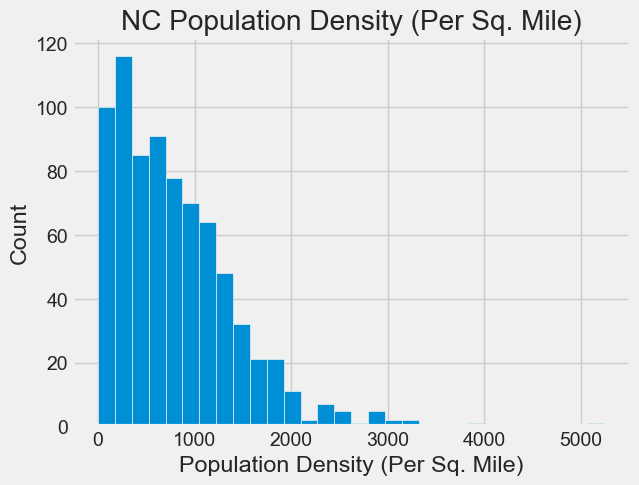

In [7]:
plt.hist(ds_final_data["Population Density (Per Sq. Mile)"], bins="auto")
plt.title("NC Population Density (Per Sq. Mile)")
plt.xlabel("Population Density (Per Sq. Mile)")
plt.ylabel("Count")
plt.show()

In [8]:
ds_final_data.sort("Total Percent of Land at Some Level of Flood Risk", descending=True).show(5)

Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 17 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Not Hispanic or Latino:,Hispanic or Latino,Population 25 Years and Over:,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree,Population 25 Years and Over:.1,Less than High School.1,High School Diploma,Bachelor's Degree or Better,Households:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Median Household Income (In 2020 Inflation Adjusted Dollars),Median Household Income Occupied Housing Units:,Owner Occupied,Renter Occupied,Per Capita Income (In 2020 Inflation Adjusted Dollars),Occupied Housing Units:,Owner Occupied.1,Renter Occupied.1,Owner Occupied Housing Units:,"White Alone, Not Hispanic or Latino Homeowners",Non-White Homeowners,Owner-Occupied Housing Units:,"Less than $20,000","$20,000 to $49,999","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $299,999","$300,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 or More",Population Under 18 Years of Age for Whom Poverty Status Is Determined:,Living in Poverty,At or Above Poverty Level,Population Age 18 to 64 for Whom Poverty Status Is Determined:,Living in Poverty.1,At or Above Poverty Level.1,Population Age 65 and Over for Whom Poverty Status Is Determined:,Living in Poverty.2,At or Above Poverty Level.2,Rural Capacity (Headwaters Index),Social Vulnerability (CDC Index),Percent of Land in 500-Year Floodplain,Percent of Land in 100-Year Floodplain,Total Percent of Land at Some Level of Flood Risk
Alexis CDP,71,Gaston,3.70088e+06,818,414.1,1.98,28,56,11,0,76,74,89,66,30,136,212,40,661,129,0,10,0,0,18,806,12,647,52,223,359,9,0,0,4,647,52,582,13,358,0,28,9,16,4,119,6,12,23,21,58,30,0,32,0,0,36250,36250,34811,nan,23289,358,310,48,310,274,36,310,0,4,44,64,150,48,0,0,0,95,0,95,335,48,287,388,20,368,nan,0.35,nan,nan,nan
Arapahoe town,137,Pamlico,3.70164e+06,397,182.8,2.17,15,19,5,2,44,39,50,73,51,44,42,13,347,33,11,0,2,0,4,386,11,312,43,133,110,15,5,3,3,312,43,243,26,200,11,4,28,7,14,4,6,11,7,5,7,44,19,22,2,9,67500,67500,80625,nan,39908,200,163,37,163,151,12,163,18,11,44,36,35,11,8,0,0,41,6,35,257,22,235,99,7,92,56,0.37,nan,nan,nan
Bailey town,127,Nash,3.70302e+06,492,700.9,0.7,87,7,15,13,31,73,43,54,43,75,41,10,292,80,0,0,0,58,62,410,82,339,49,119,108,57,6,0,0,339,49,227,63,215,2,15,9,12,37,6,32,3,6,14,8,41,22,2,6,0,39018,39018,47083,35250,24650,215,143,72,143,107,36,143,0,14,44,46,26,9,0,4,0,122,72,50,244,48,196,126,8,118,56,0.67,nan,nan,nan
Bear Grass town,117,Martin,3.70418e+06,82,323.4,0.25,17,1,1,3,0,8,18,15,3,10,6,0,77,0,0,0,0,0,5,77,5,60,7,11,35,5,0,0,2,60,7,46,7,33,0,2,0,0,4,1,4,0,10,1,5,3,1,0,2,0,48875,48875,49125,nan,22773,33,27,6,27,27,0,27,2,1,16,1,7,0,0,0,0,22,0,22,44,10,34,16,0,16,53,0.49,nan,nan,nan
Beech Mountain town,"11, 189","Avery, Watauga",3.70451e+06,766,118.2,6.48,10,27,31,18,12,40,69,75,177,191,94,22,734,3,8,9,0,0,12,757,9,668,22,97,250,162,83,30,24,668,22,347,299,350,11,8,9,14,15,10,6,12,23,37,45,42,35,24,25,34,72917,72917,74444,51250,45259,350,318,32,318,311,7,318,0,2,15,20,132,103,29,13,4,86,16,70,373,25,348,307,17,290,nan,0.23,nan,nan,nan


In [9]:
alexis_cdp = ds_final_data.where("Geography Name", "Alexis CDP")
alexis_cdp.show()

Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 17 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Not Hispanic or Latino:,Hispanic or Latino,Population 25 Years and Over:,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree,Population 25 Years and Over:.1,Less than High School.1,High School Diploma,Bachelor's Degree or Better,Households:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Median Household Income (In 2020 Inflation Adjusted Dollars),Median Household Income Occupied Housing Units:,Owner Occupied,Renter Occupied,Per Capita Income (In 2020 Inflation Adjusted Dollars),Occupied Housing Units:,Owner Occupied.1,Renter Occupied.1,Owner Occupied Housing Units:,"White Alone, Not Hispanic or Latino Homeowners",Non-White Homeowners,Owner-Occupied Housing Units:,"Less than $20,000","$20,000 to $49,999","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $299,999","$300,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 or More",Population Under 18 Years of Age for Whom Poverty Status Is Determined:,Living in Poverty,At or Above Poverty Level,Population Age 18 to 64 for Whom Poverty Status Is Determined:,Living in Poverty.1,At or Above Poverty Level.1,Population Age 65 and Over for Whom Poverty Status Is Determined:,Living in Poverty.2,At or Above Poverty Level.2,Rural Capacity (Headwaters Index),Social Vulnerability (CDC Index),Percent of Land in 500-Year Floodplain,Percent of Land in 100-Year Floodplain,Total Percent of Land at Some Level of Flood Risk
Alexis CDP,71,Gaston,3.70088e+06,818,414.1,1.98,28,56,11,0,76,74,89,66,30,136,212,40,661,129,0,10,0,0,18,806,12,647,52,223,359,9,0,0,4,647,52,582,13,358,0,28,9,16,4,119,6,12,23,21,58,30,0,32,0,0,36250,36250,34811,nan,23289,358,310,48,310,274,36,310,0,4,44,64,150,48,0,0,0,95,0,95,335,48,287,388,20,368,nan,0.35,nan,nan,nan


In [30]:
# Merge Golden Leaf Data
golden_leaf_data = pd.read_csv("golden_leaf_data.csv")
final_data_2 = final_data.merge(golden_leaf_data, left_on='County Name', right_on='County', how='left')

# Drop last 5 columns
final_data_2 = final_data_2.iloc[:, :-7]

# Drop column
final_data_2.drop(columns=["Natural Infrastructure", "Gray Infrastructure", "Hybrid Solution", "Flood Risk Metric(s)"], inplace=True)

# Remove commas from numbers
str_to_flt("Grant Award ($)")
str_to_flt("Encumbered ($)")
#str_to_flt("Total Population")

# Convert columns to new type
#final_data_2["Application Date"] = final_data_2["Application Date"].astype(int)
#final_data_2["Award Date"] = final_data_2["Award Date"].astype(int)

final_data_2["Grant Award ($)"] = final_data_2["Grant Award ($)"].astype(float)
final_data_2["Encumbered ($)"] = final_data_2["Encumbered ($)"].astype(float)
#final_data_2["Total Population"] = final_data_2["Total Population"].astype(float)

final_data_2.to_csv("final_data_with_golden_leaf.csv", index=False)

<class 'numpy.float64'>
<class 'numpy.float64'>


/var/folders/sb/jbh1d71j5c9clmnb_rnsjqb00000gn/T/ipykernel_8525/139254671.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data_2[column_name] = final_data_2[column_name].str.replace('$', '')


Below we analyze the correlation between the variables in the dataset.

In [31]:
type(final_data_2["Total Population"][0])

numpy.float64

/var/folders/sb/jbh1d71j5c9clmnb_rnsjqb00000gn/T/ipykernel_8525/1475746581.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_data_2.corr()


<AxesSubplot: >

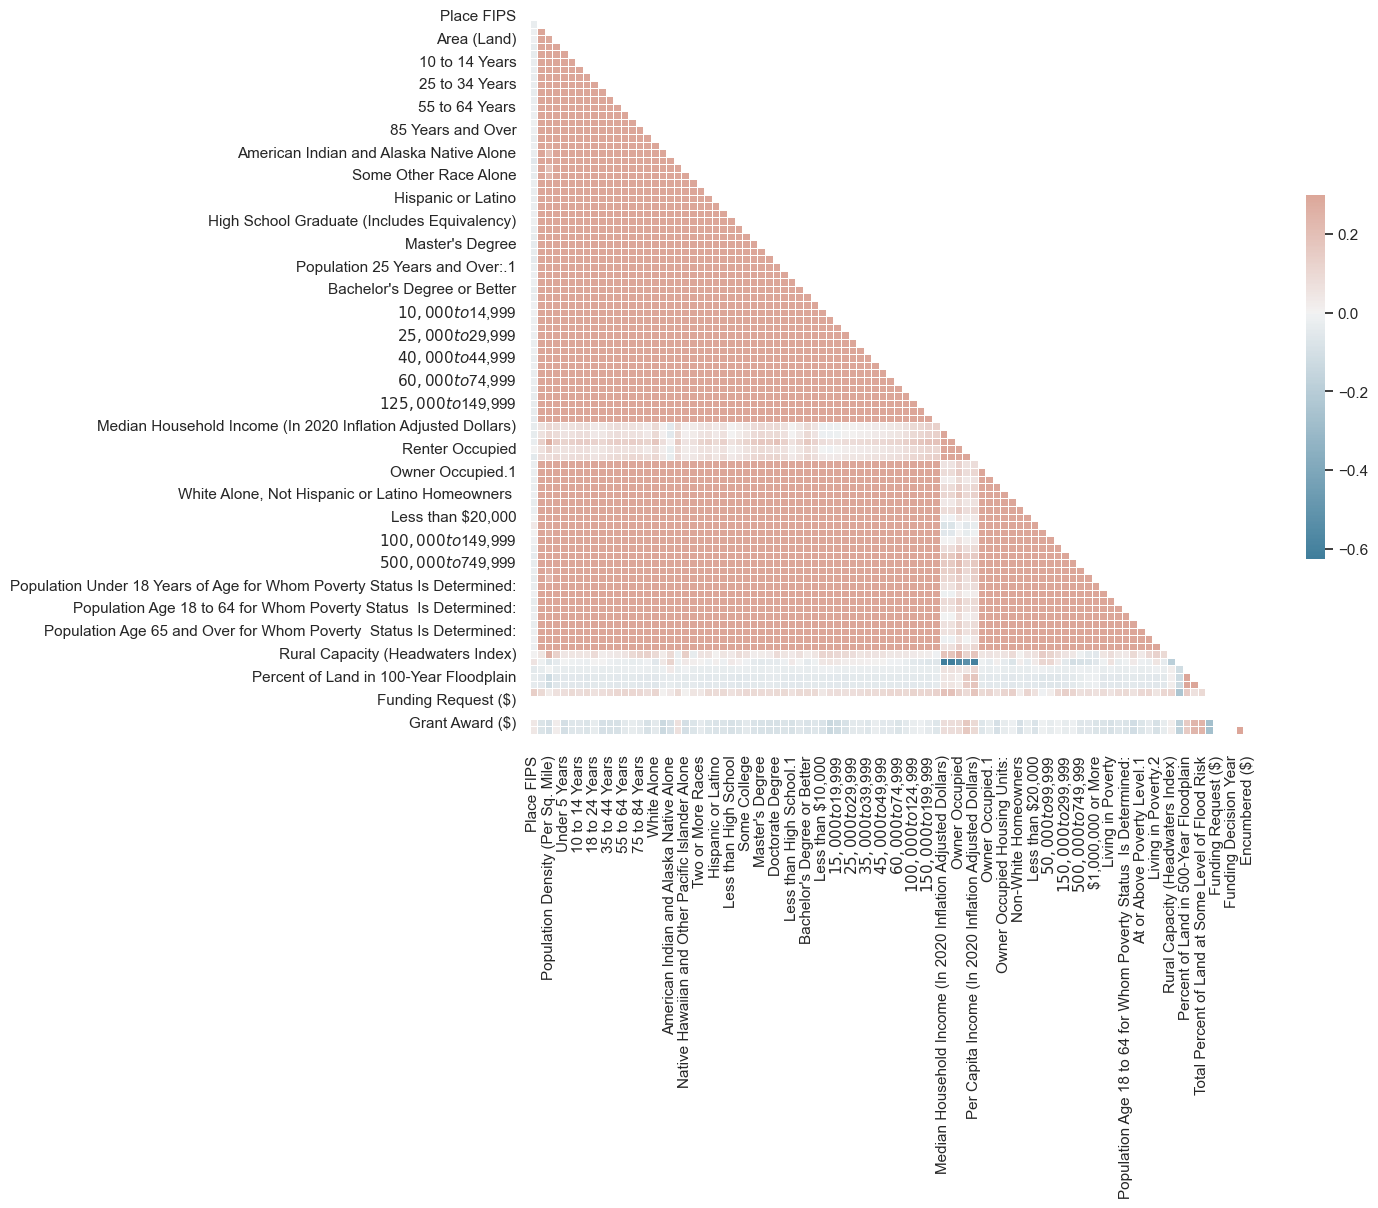

In [36]:
sns.set_theme(style="white")
from string import ascii_letters

# Compute the correlation matrix
corr = final_data_2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


We now look at the variables in the alexis_cdp dataset.

In [13]:
alexis_cdp

,Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,...,State Agency Requested for Funding,Funding Request ($),Total Project Budget ($),Funding Decision Year,Award Date,Grant Award ($),Encumbered ($),City/Town,County,Place ID
5,Alexis CDP,71,Gaston,3700880.0,818.0,414.1,1.98,28.0,56.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


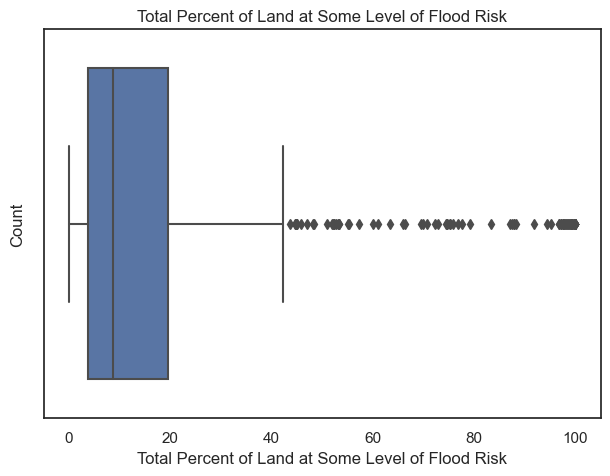

In [14]:
# Box and whisker plot of Total Percent of Land at Some Level of Flood Risk
sns.boxplot(x=final_data_2["Total Percent of Land at Some Level of Flood Risk"])
plt.title("Total Percent of Land at Some Level of Flood Risk")
plt.xlabel("Total Percent of Land at Some Level of Flood Risk")
plt.ylabel("Count")
plt.show()

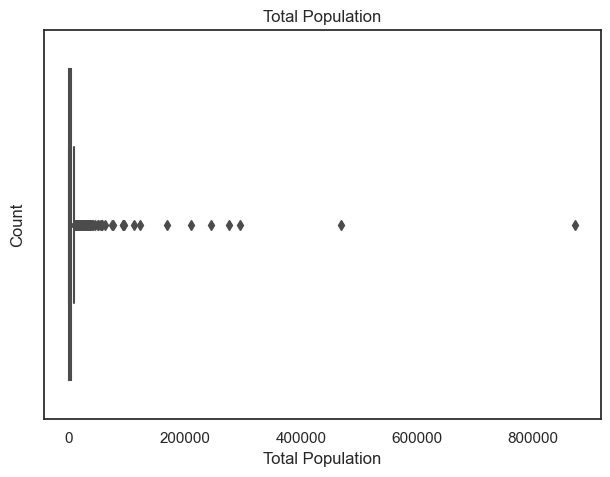

In [15]:
# Box and whisker plot of Total Population
sns.boxplot(x=final_data_2["Total Population"])
plt.title("Total Population")
plt.xlabel("Total Population")
plt.ylabel("Count")
plt.show()

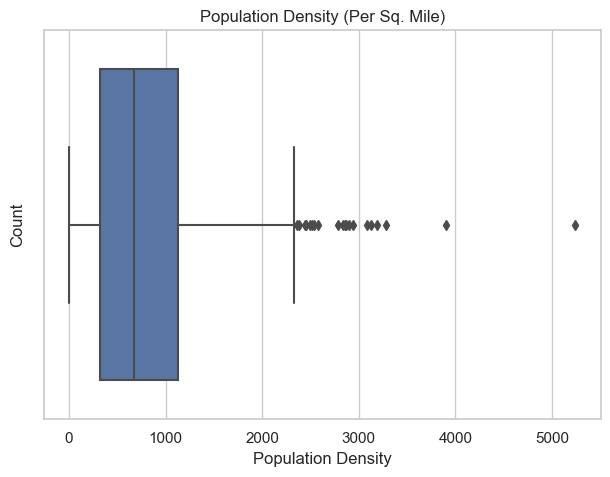

In [17]:
sns.boxplot(x=final_data_2["Population Density (Per Sq. Mile)"])
plt.title("Population Density (Per Sq. Mile)")
plt.xlabel("Population Density")
plt.ylabel("Count")
plt.show()

There are some outliers in the Total Population and Population Density (Per Sq. Mile) variables. We will remove these outliers.

Let's look at correlations between the variables of Golden LEAF and the Total Percent of Land at Some Level of Flood Risk.

In [18]:
final_data_2

,Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,...,State Agency Requested for Funding,Funding Request ($),Total Project Budget ($),Funding Decision Year,Award Date,Grant Award ($),Encumbered ($),City/Town,County,Place ID
0,Aberdeen town,125,Moore,3700160.0,7862.0,774.8,10.15,849.0,723.0,277.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Advance CDP,59,Davie,3700440.0,1135.0,158.5,7.16,141.0,116.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahoskie town,91,Hertford,3700500.0,4819.0,1095.0,4.40,256.0,178.0,312.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alamance village,1,Alamance,3700640.0,1280.0,1609.8,0.80,15.0,108.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albemarle city,167,Stanly,3700680.0,16073.0,920.6,17.46,1008.0,1324.0,876.0,...,Golden LEAF Foundation Flood Mitigation Program,NaN,NaN,2022.0,10/6/22,"$250,000","$250,000",Albemarle,Stanly,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,Yadkin College CDP,57,Davidson,3775880.0,696.0,241.5,2.88,55.0,73.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,Yadkinville town,197,Yadkin,3775960.0,2892.0,986.9,2.93,128.0,257.0,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,Yanceyville town,33,Caswell,3776000.0,2830.0,408.6,6.93,177.0,52.0,140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,Youngsville town,69,Franklin,3776200.0,2225.0,1213.5,1.83,132.0,193.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Correlation between Total Percent of Land at Some Level of Flood Risk and Golden LEAF
final_data_2["Total Percent of Land at Some Level of Flood Risk"].corr(final_data_2["Grant Award ($)"])

0.2447525483073979

In [38]:
# Econometric model to test the correlation between Total Percent of Land at Some Level of Flood Risk and Golden LEAF
from statsmodels.formula.api import ols

model = ols('final_data_2["Total Percent of Land at Some Level of Flood Risk"] ~ final_data_2["Grant Award ($)"]', data=final_data_2).fit()
print(model.summary())

                                                    OLS Regression Results                                                   
Dep. Variable:     final_data_2["Total Percent of Land at Some Level of Flood Risk"]   R-squared:                       0.060
Model:                                                                           OLS   Adj. R-squared:                  0.054
Method:                                                                Least Squares   F-statistic:                     9.940
Date:                                                               Fri, 10 Mar 2023   Prob (F-statistic):            0.00194
Time:                                                                       12:25:30   Log-Likelihood:                -757.79
No. Observations:                                                                158   AIC:                             1520.
Df Residuals:                                                                    156   BIC:                           